# DATASET DETAILS

In [ ]:
# This dataset has funding information of the Indian startups from January 2015 to August 2017.
# Feature Details :
# SNo - Serial number.
# Date - Date of funding in format DD/MM/YYYY.
# StartupName - Name of the startup which got funded.
# IndustryVertical - Industry to which the startup belongs.
# SubVertical - Sub-category of the industry type.
# CityLocation - City which the startup is based out of.
# InvestorsName - Name of the investors involved in the funding round.
# InvestmentType - Either Private Equity or Seed Funding.
# AmountInUSD - Funding Amount in USD.
# Remarks - Other information, if any.
# Insights -
# Find out what type of startups are getting funded in the last few years?
# Who are the important investors?
# What are the hot fields that get a lot of funding these days?

# PROBLEM STATEMENTS

In [63]:
# Problem Statement 1:
# Check the trend of investments over the years. To check the trend, find -
# Total number of fundings done in each year.
# Plot a line graph between year and number of fundings.
# Print year-wise total number of fundings also Print years.

2015 936
2016 993
2017 443


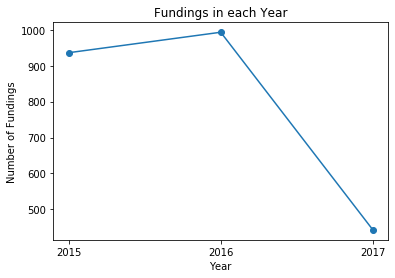

In [64]:
import matplotlib.pyplot as plt
import cs
import numpy as np
import collections
with open('startup_funding.csv',encoding = 'utf-8') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    l = list(file_data)
    
    job = {}
    
    for row in l:
        x = row['Date']
        key = x[-4:]
        
        if key in job:
            job[key] += 1
        else:
            job[key] = 1
             
    od = collections.OrderedDict(sorted(job.items()))
    year = []
    fundings = []
    for i in od:
        year.append(int(i))
        fundings.append(od[i])
        print(i,od[i])
    plt.plot(year,fundings,marker = 'o')
    plt.xticks(year)
    plt.title("Fundings in each Year")
    plt.xlabel("Year")
    plt.ylabel('Number of Fundings')
    plt.show()

In [65]:
# Problem Statement 2:
# Find out which cities are generally chosen for starting a startup.
# Find top 10 Indian cities which have most number of startups?
# Plot a pie chart and visualise it.
# Print the city name and number of startups in that city also.

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


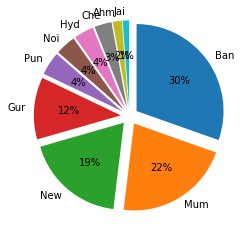

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
city = df['CityLocation'].value_counts()[:10]
number = city.values
city = city.index
for i in range(len(city)):
    print(city[i],number[i])
labels = []
for i in city:
    labels.append(i[:3])
plt.pie(number,labels = labels,autopct='%0.0f%%',counterclock=False,startangle=90,explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

In [162]:
# Problem Statement 3:
# Find out if cities play any role in receiving funding.
# Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got.
# Print the city and percentage.

Bangalore 49.71%
New Delhi 16.63%
Mumbai 13.90%
Gurgaon 12.21%
Chennai 2.43%
Pune 2.16%
Hyderabad 1.15%
Noida 1.01%
Ahmedabad 0.58%
Jaipur 0.21%


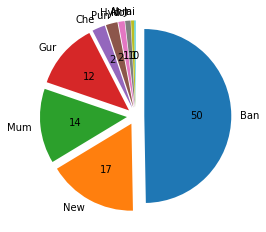

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'.2f'),end="")
    print('%')
labels = []
for i in city:
    labels.append(i[:3])
plt.pie(percent,labels = labels,autopct='%0.0f',counterclock=False,startangle=90,explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

In [ ]:
# Problem Statement 4:
# There are 4 different type of investments. Find out percentage of amount funded for each investment type.
# Plot a pie chart to visualise.
# Print the investment type and percentage of amount funded.

Private Equity 98.15%
Seed Funding 1.81%
Debt Funding 0.04%
Crowd Funding 0.00%


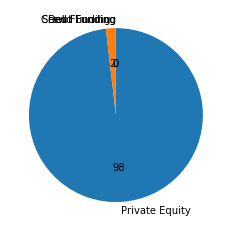

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('CrowdFunding','Crowd Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
investment = df.index
amount = df.values
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'.2f'),end="")
    print('%')
plt.pie(percent,labels = investment,autopct='%0.0f',counterclock=False,startangle=90)
plt.show()

In [229]:
# Problem Statement 5:
# Which type of companies got more easily funding. To answer this question, find -
# Top 5 industries and percentage of the total amount funded to that industry.
# Print the industry name and percentage of the amount funded.

Ecommerce 34.62%
Consumer Internet 30.70%
Technology 8.92%
Online Marketplace 5.66%
E-Commerce & M-Commerce platform 5.50%
Car Aggregator & Retail Mobile App 4.04%
Ecommerce Marketplace 4.04%
Cab Aggregator 3.23%
Cab rental Mobile app 1.82%
Logistics 1.46%


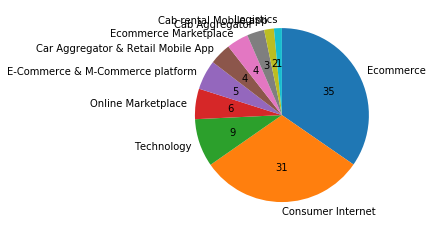

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
industry = df.index
amount = df.values
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(percent[i],'.2f'),end="")
    print('%')
plt.pie(percent,labels = industry,autopct='%0.0f',counterclock=False,startangle=90)
plt.show()

In [232]:
# Problem Statement 6:
# Find top 5 startups with most amount of total funding.
# Print the startup name with amount of funding.

Paytm 26.36%
Flipkart 25.45%
Ola 21.40%
Snapdeal 7.88%
Oyo 7.17%
Quikr 2.59%
Delhivery 2.42%
Foodpanda 2.37%
BigBasket 2.33%
MakeMyTrip 2.03%


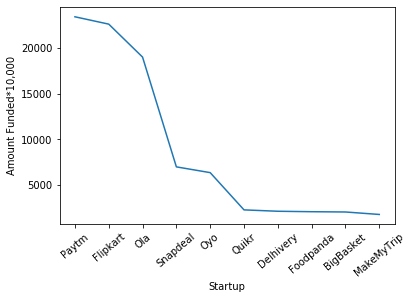

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
startup = df.index
amount = df.values
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(startup)):
    print(startup[i],format(percent[i],'.2f'),end="")
    print('%')
    
plt.plot(startup,amount/100000)
plt.xticks(rotation = 40)
plt.ylabel('Amount Funded*10,000')
plt.xlabel('Startup')
plt.show()

In [ ]:
# Problem Statement 7:
# Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum 
# number of times.
# Print the startup name with number of funding rounds.

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


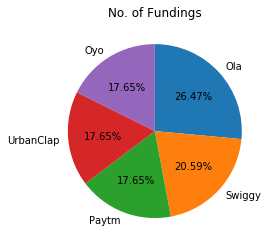

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)

fundingRounds = df['StartupName'].value_counts()[:5]
startup = fundingRounds.index
fundingRounds = fundingRounds.values
for i in range(len(startup)):
    print(startup[i],fundingRounds[i])
plt.pie(fundingRounds,labels = startup,autopct='%0.2f%%',counterclock=False,startangle=90)
plt.xticks(rotation = 40)
plt.title('No. of Fundings')
plt.show()

In [260]:
# Problem Statement 8:
# Find the Investors who have invested maximum number of times.
# Print the investor name and number of times invested.

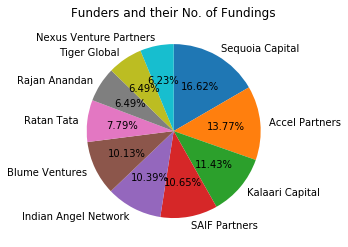

In [364]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import operator
import pandas as pd
with open('startup_funding.csv',encoding = 'utf-8') as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace=True)
    l = list(file_data)    
job = {}
for row in l:
    x = row['InvestorsName']
    y = x.strip().split(',')
    for i in y:
        key = i.strip()
        if(key=='Undisclosed Investors' or key=='Undisclosed investors' or key==''):
            continue
        if key in job:
            job[key] += 1
        else:
            job[key] = 1

od = dict(sorted(job.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame(list(od.values()),list(od.keys()))
df = df[:10]
investor = df.index
timesInvested = df.values
timesInvested = timesInvested.reshape(10)
plt.pie(timesInvested,labels = investor,autopct='%0.2f%%',counterclock=False,startangle=90)
plt.title('Funders and their No. of Fundings')
plt.show()